In [261]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from copy import copy
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

df = pd.read_csv('OnlineNewsPopularity.csv')
original = copy(df)

import warnings
warnings.filterwarnings("ignore")

**Getting information from the raw csv file**

In [262]:
print(df.describe)
df.columns
# The first two columns are non predictive so we can remove them

<bound method NDFrame.describe of                                                      url   timedelta  \
0      http://mashable.com/2013/01/07/amazon-instant-...       731.0   
1      http://mashable.com/2013/01/07/ap-samsung-spon...       731.0   
2      http://mashable.com/2013/01/07/apple-40-billio...       731.0   
3      http://mashable.com/2013/01/07/astronaut-notre...       731.0   
4       http://mashable.com/2013/01/07/att-u-verse-apps/       731.0   
...                                                  ...         ...   
39639  http://mashable.com/2014/12/27/samsung-app-aut...         8.0   
39640  http://mashable.com/2014/12/27/seth-rogen-jame...         8.0   
39641  http://mashable.com/2014/12/27/son-pays-off-mo...         8.0   
39642     http://mashable.com/2014/12/27/ukraine-blasts/         8.0   
39643  http://mashable.com/2014/12/27/youtube-channel...         8.0   

        n_tokens_title   n_tokens_content   n_unique_tokens  \
0                 12.0              21

Index(['url', ' timedelta', ' n_tokens_title', ' n_tokens_content',
       ' n_unique_tokens', ' n_non_stop_words', ' n_non_stop_unique_tokens',
       ' num_hrefs', ' num_self_hrefs', ' num_imgs', ' num_videos',
       ' average_token_length', ' num_keywords', ' data_channel_is_lifestyle',
       ' data_channel_is_entertainment', ' data_channel_is_bus',
       ' data_channel_is_socmed', ' data_channel_is_tech',
       ' data_channel_is_world', ' kw_min_min', ' kw_max_min', ' kw_avg_min',
       ' kw_min_max', ' kw_max_max', ' kw_avg_max', ' kw_min_avg',
       ' kw_max_avg', ' kw_avg_avg', ' self_reference_min_shares',
       ' self_reference_max_shares', ' self_reference_avg_sharess',
       ' weekday_is_monday', ' weekday_is_tuesday', ' weekday_is_wednesday',
       ' weekday_is_thursday', ' weekday_is_friday', ' weekday_is_saturday',
       ' weekday_is_sunday', ' is_weekend', ' LDA_00', ' LDA_01', ' LDA_02',
       ' LDA_03', ' LDA_04', ' global_subjectivity',
       ' global_sent

In [263]:
df.drop(['url', ' timedelta'],axis=1, inplace=True)
df.head()

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,4.680365,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,4.913725,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,4.393365,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,4.404896,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,4.682836,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [264]:
# We can also see that there are individual columns for genres and days where we could merge them.

df['channel'] = np.where(df[' data_channel_is_bus'], 'Business',
                       np.where(df[' data_channel_is_lifestyle'], 'Lifestyle',
                                np.where(df[' data_channel_is_entertainment'], 'Entertainment',
                                         np.where(df[' data_channel_is_socmed'], 'Social Media',
                                                  np.where(df[' data_channel_is_tech'], 'Technology',
                                                           np.where(df[' data_channel_is_world'], 'World', 'Unknown'))))))
df.drop([' data_channel_is_bus', ' data_channel_is_lifestyle', ' data_channel_is_socmed', 
         ' data_channel_is_entertainment', ' data_channel_is_tech', ' data_channel_is_world'], axis=1, inplace=True)

df['weekday'] = np.where(df[' weekday_is_monday'], 'Monday',
                         np.where(df[' weekday_is_tuesday'], 'Tuesday',
                                  np.where(df[' weekday_is_wednesday'], 'Wednesday',
                                           np.where(df[' weekday_is_thursday'], 'Thursday',
                                                    np.where(df[' weekday_is_friday'], 'Friday',
                                                             np.where(df[' weekday_is_saturday'], 'Saturday',
                                                                      np.where(df[' weekday_is_sunday'], 'Sunday', 'Unknown')))))))
df.drop([' weekday_is_monday', ' weekday_is_tuesday', ' weekday_is_wednesday',
         ' weekday_is_thursday', ' weekday_is_friday',  ' weekday_is_saturday', ' weekday_is_sunday'], axis=1, inplace=True)
df.columns
df.head()

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares,channel,weekday
0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,4.680365,...,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593,Entertainment,Monday
1,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,4.913725,...,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711,Business,Monday
2,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,4.393365,...,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500,Business,Monday
3,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,4.404896,...,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200,Entertainment,Monday
4,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,4.682836,...,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505,Technology,Monday


In [265]:
# We now need to regroup the ' shares' values in a few batches in order to minimize the prediction cost. (less labels = less time to predict)

bins = [0, 500, 1000, 1500, 30000, 50000, 75000, 843300]
labels = ['Very Low', 'Low', 'Medium', 'High', 'Very High', 'Excellent', 'Extreme']
df['popularity'] = pd.cut(df[' shares'], bins=bins, labels=labels)
df.head()

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares,channel,weekday,popularity
0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,4.680365,...,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593,Entertainment,Monday,Low
1,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,4.913725,...,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711,Business,Monday,Low
2,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,4.393365,...,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500,Business,Monday,Medium
3,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,4.404896,...,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200,Entertainment,Monday,Medium
4,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,4.682836,...,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505,Technology,Monday,Low


**Data Visualization before pre-processing**

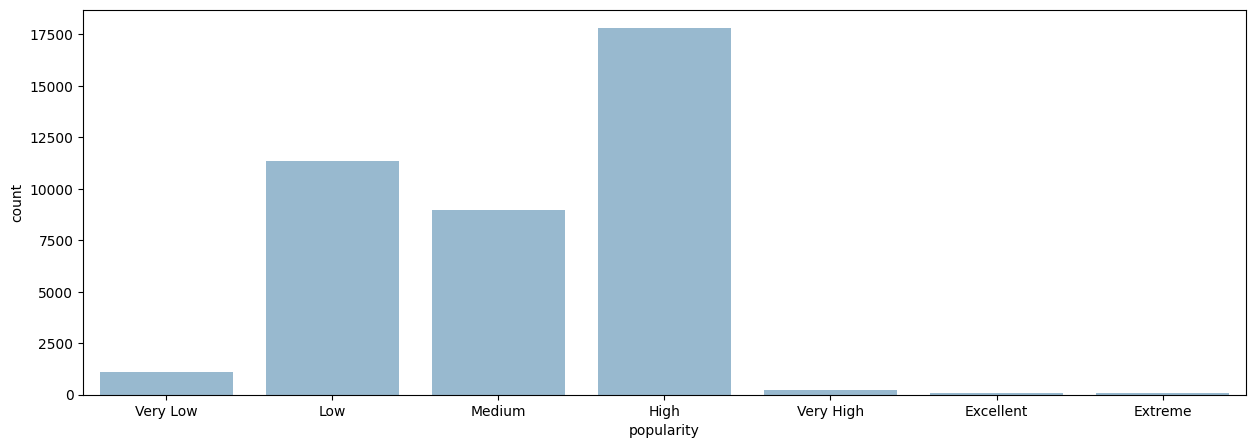

In [266]:
fig = plt.figure(figsize=(15, 5))
ax = sns.countplot(x='popularity', data=df, alpha=0.5)

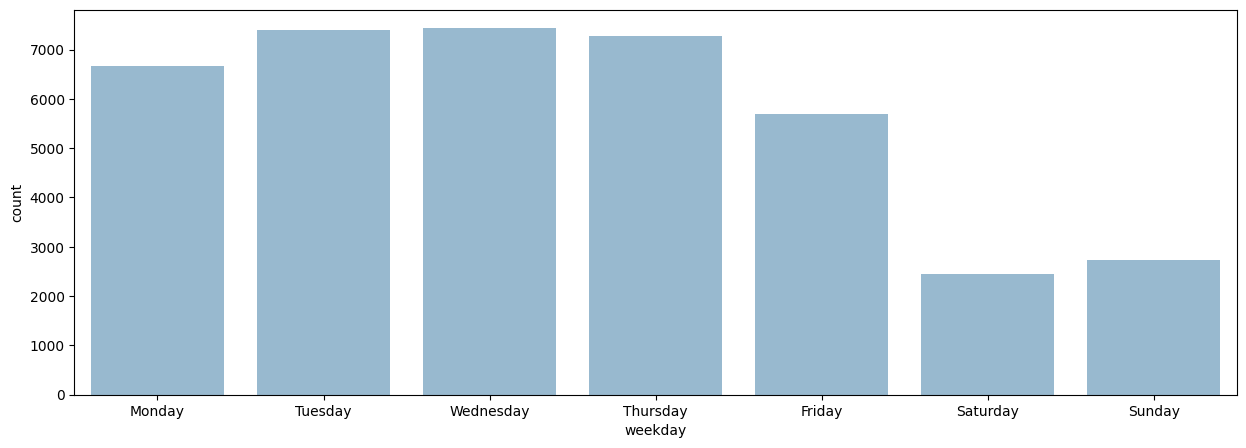

In [267]:
fig = plt.figure(figsize=(15, 5))
ax = sns.countplot(x='weekday', data=df, alpha=0.5)

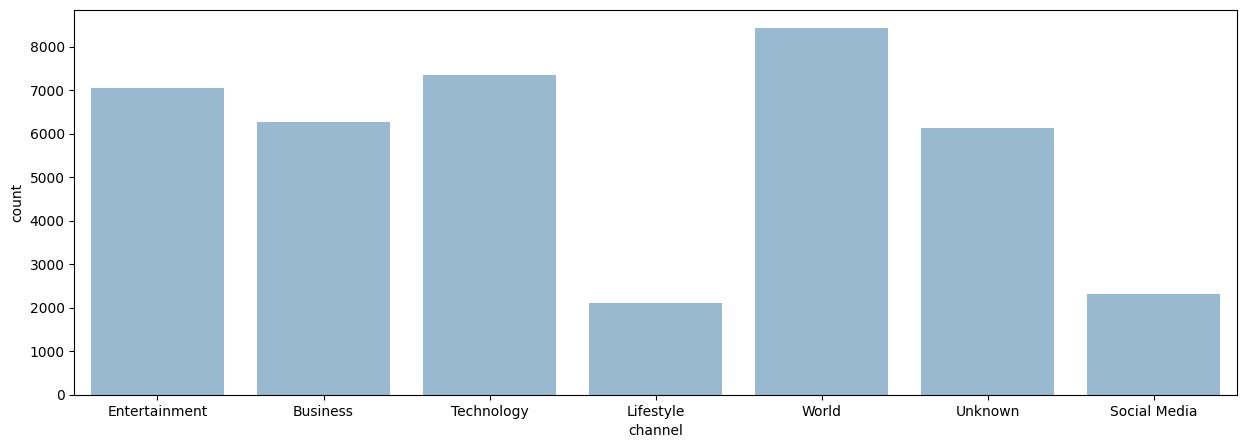

In [268]:
fig = plt.figure(figsize=(15, 5))
ax = sns.countplot(x='channel', data=df, alpha=0.5)

Therefore, we can see some disparities in the data distribution especially in the column we want to predict. It can be problematic since the models can have trouble being accurate with such discrepancies.

In [269]:
# Let's see what we're left with

df.columns

Index([' n_tokens_title', ' n_tokens_content', ' n_unique_tokens',
       ' n_non_stop_words', ' n_non_stop_unique_tokens', ' num_hrefs',
       ' num_self_hrefs', ' num_imgs', ' num_videos', ' average_token_length',
       ' num_keywords', ' kw_min_min', ' kw_max_min', ' kw_avg_min',
       ' kw_min_max', ' kw_max_max', ' kw_avg_max', ' kw_min_avg',
       ' kw_max_avg', ' kw_avg_avg', ' self_reference_min_shares',
       ' self_reference_max_shares', ' self_reference_avg_sharess',
       ' is_weekend', ' LDA_00', ' LDA_01', ' LDA_02', ' LDA_03', ' LDA_04',
       ' global_subjectivity', ' global_sentiment_polarity',
       ' global_rate_positive_words', ' global_rate_negative_words',
       ' rate_positive_words', ' rate_negative_words',
       ' avg_positive_polarity', ' min_positive_polarity',
       ' max_positive_polarity', ' avg_negative_polarity',
       ' min_negative_polarity', ' max_negative_polarity',
       ' title_subjectivity', ' title_sentiment_polarity',
       ' abs_t

 n_tokens_title         0
 n_tokens_content    1181
 n_unique_tokens     1181
 n_non_stop_words    1181
dtype: int64
count    39644.000000
mean         0.996469
std          5.231231
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max       1042.000000
Name:  n_non_stop_words, dtype: float64


Index([' n_tokens_title', ' n_tokens_content', ' n_unique_tokens',
       ' n_non_stop_unique_tokens', ' num_hrefs', ' num_self_hrefs',
       ' num_imgs', ' num_videos', ' average_token_length', ' num_keywords',
       ' kw_min_min', ' kw_max_min', ' kw_avg_min', ' kw_min_max',
       ' kw_max_max', ' kw_avg_max', ' kw_min_avg', ' kw_max_avg',
       ' kw_avg_avg', ' self_reference_min_shares',
       ' self_reference_max_shares', ' self_reference_avg_sharess',
       ' is_weekend', ' LDA_00', ' LDA_01', ' LDA_02', ' LDA_03', ' LDA_04',
       ' global_subjectivity', ' global_sentiment_polarity',
       ' global_rate_positive_words', ' global_rate_negative_words',
       ' rate_positive_words', ' rate_negative_words',
       ' avg_positive_polarity', ' min_positive_polarity',
       ' max_positive_polarity', ' avg_negative_polarity',
       ' min_negative_polarity', ' max_negative_polarity',
       ' title_subjectivity', ' title_sentiment_polarity',
       ' abs_title_subjectivity', '

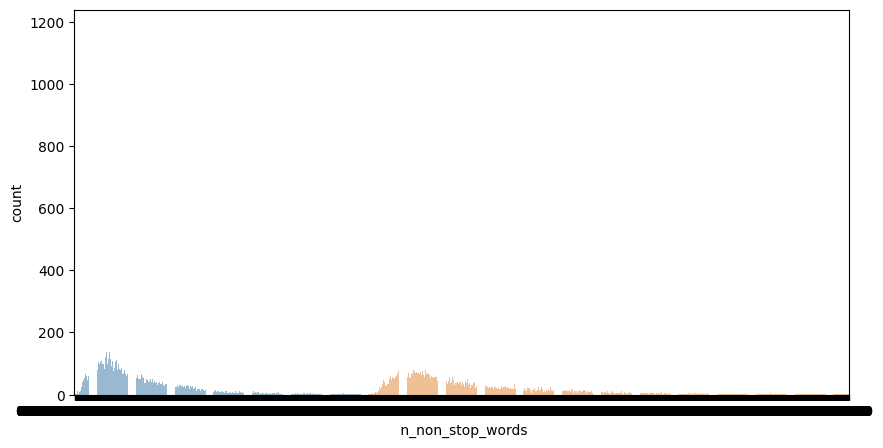

In [270]:
# let's take a look at the tokens' information

tokens = df[[' n_tokens_title', ' n_tokens_content', ' n_unique_tokens', ' n_non_stop_words']]
print((tokens == 0).sum())

# let's visualize this so that it gets clearer

fig = plt.figure(figsize=(10, 5))
ax = sns.countplot(x=' n_non_stop_words', data=tokens, alpha=0.5)
ax = sns.countplot(x=' n_tokens_content', data=tokens, alpha=0.5)

print(df[' n_non_stop_words'].describe()) # It seems that any value that the max value (1042) is noise considering the mean and std of the column

df = df[df[' n_non_stop_words'] != 1042] # We select the lines that don't contain noise than we drop the column
df.drop(' n_non_stop_words', axis=1, inplace=True)
df.columns


In [271]:
# Furthermore, the lines having 0 tokens are bugged since an article at least needs some tokens to exist

df = df[df[' n_tokens_content'] != 0]
df.head()

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,...,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares,channel,weekday,popularity
0,12.0,219.0,0.663594,0.815385,4.0,2.0,1.0,0.0,4.680365,5.0,...,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593,Entertainment,Monday,Low
1,9.0,255.0,0.604743,0.791946,3.0,1.0,1.0,0.0,4.913725,4.0,...,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711,Business,Monday,Low
2,9.0,211.0,0.575130,0.663866,3.0,1.0,1.0,0.0,4.393365,6.0,...,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500,Business,Monday,Medium
3,9.0,531.0,0.503788,0.665635,9.0,0.0,1.0,0.0,4.404896,7.0,...,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200,Entertainment,Monday,Medium
4,13.0,1072.0,0.415646,0.540890,19.0,19.0,20.0,0.0,4.682836,7.0,...,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505,Technology,Monday,Low


In [272]:
# Now that we have removed the noise and undesireable columns, let's see if there are some strong correlations between some columns
encoder = OrdinalEncoder()
encoded_df = pd.DataFrame(encoder.fit_transform(df))

corr_matrix = encoded_df.corr()
corr_dict = {}
for i in range(corr_matrix.shape[0]):
    for j in range(corr_matrix.shape[0]):
        if abs(corr_matrix[i][j]) >= 0.8 and i != j:
            print(f"Strong correlation between {i} and {j}: {corr_matrix[i][j]:.2f}")
            if i not in corr_dict.keys() and j not in corr_dict.keys():
                corr_dict[i] = j
print(corr_dict)

# Now let's make it more readable
label_corr_dict = {df.columns[key]: df.columns[value] for key, value in corr_dict.items()}
print(label_corr_dict)

Strong correlation between 1 and 2: -0.82
Strong correlation between 2 and 1: -0.82
Strong correlation between 2 and 3: 0.86
Strong correlation between 3 and 2: 0.86
Strong correlation between 13 and 16: 0.86
Strong correlation between 16 and 13: 0.86
Strong correlation between 17 and 18: 0.80
Strong correlation between 18 and 17: 0.80
Strong correlation between 19 and 20: 0.83
Strong correlation between 20 and 19: 0.83
Strong correlation between 20 and 21: 0.83
Strong correlation between 21 and 20: 0.83
Strong correlation between 32 and 33: -1.00
Strong correlation between 33 and 32: -1.00
{1: 2, 2: 3, 13: 16, 17: 18, 19: 20, 20: 21, 32: 33}
{' n_tokens_content': ' n_unique_tokens', ' n_unique_tokens': ' n_non_stop_unique_tokens', ' kw_min_max': ' kw_min_avg', ' kw_max_avg': ' kw_avg_avg', ' self_reference_min_shares': ' self_reference_max_shares', ' self_reference_max_shares': ' self_reference_avg_sharess', ' rate_positive_words': ' rate_negative_words'}


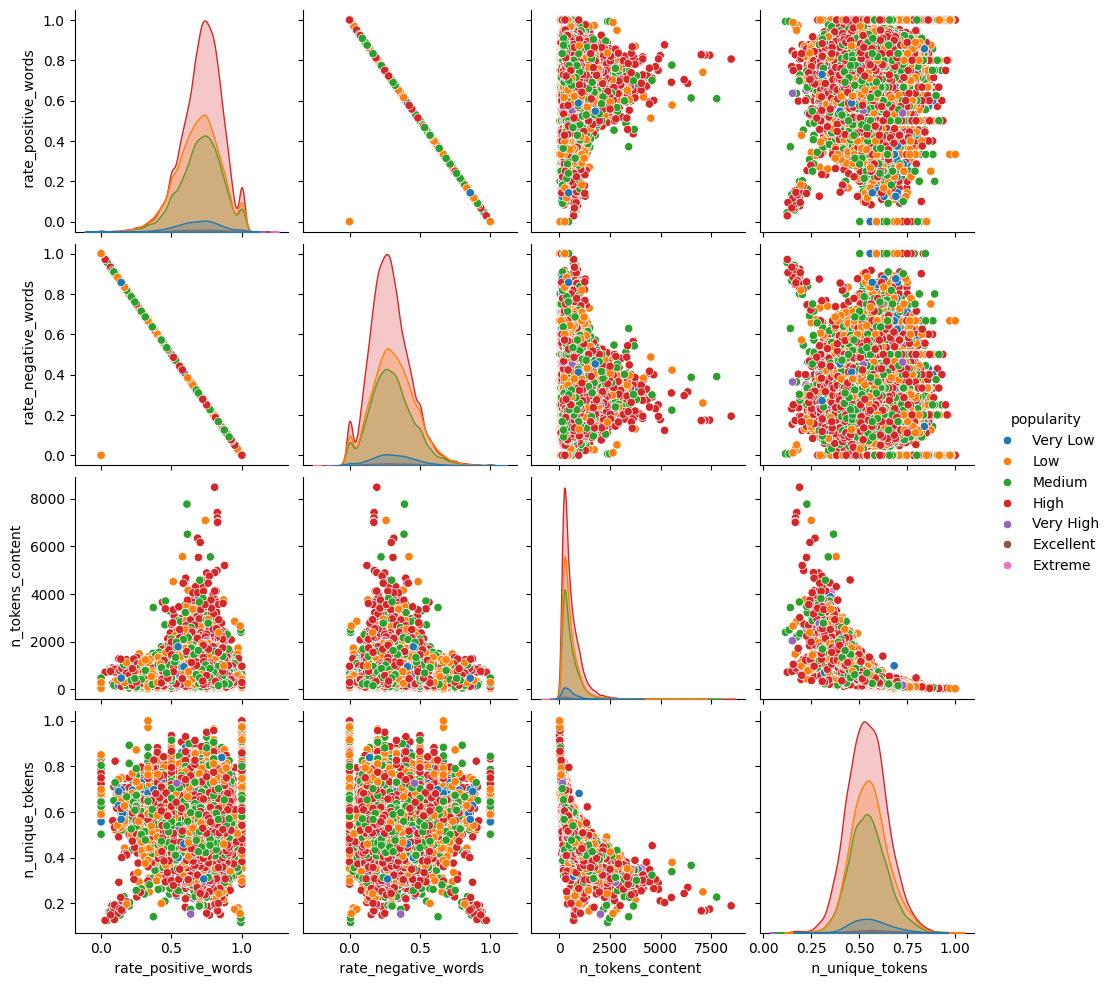

In [273]:
# Let's check the values are indeed correlated
# Plotting a pairplot with all the data takes too long so we will take a more representative sample

temp = df[df[' shares'] <= 100000]
cols = [' rate_positive_words', ' rate_negative_words', ' n_tokens_content', ' n_unique_tokens']
sns.pairplot(temp, vars=cols, hue='popularity', diag_kind='kde')

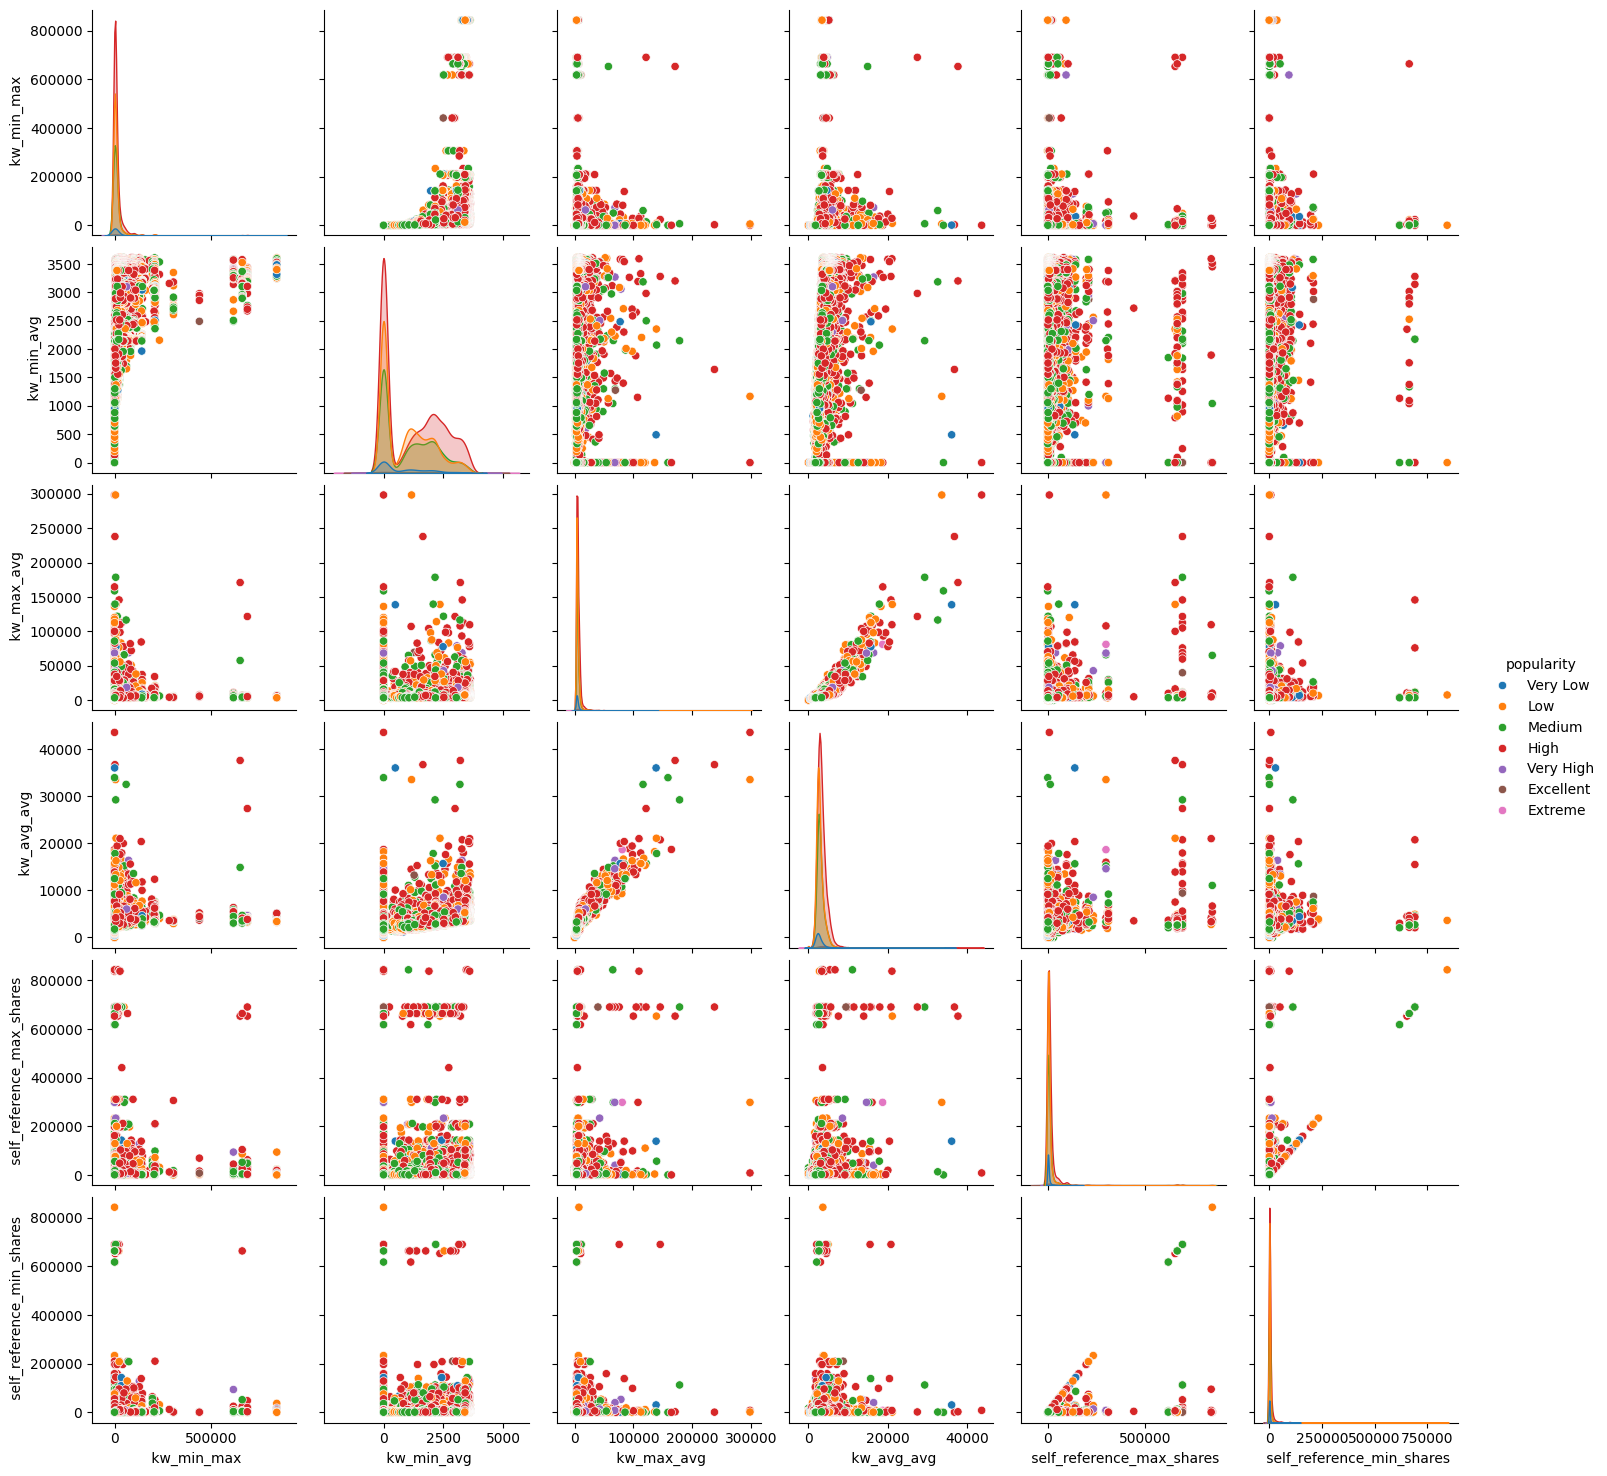

In [274]:
cols = [' kw_min_max', ' kw_min_avg', ' kw_max_avg', ' kw_avg_avg', ' self_reference_max_shares', ' self_reference_min_shares']
sns.pairplot(temp, vars=cols, hue='popularity', diag_kind='kde')

In [275]:
# Now that we have established which values are stronly correlated with one another, let's drop these columns to gain efficiency

df.drop(list(label_corr_dict.values()), axis=1, inplace=True)
df.head()

,n_tokens_title,n_tokens_content,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,kw_min_min,kw_max_min,...,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares,channel,weekday,popularity
0,12.0,219.0,4.0,2.0,1.0,0.0,4.680365,5.0,0.0,0.0,...,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593,Entertainment,Monday,Low
1,9.0,255.0,3.0,1.0,1.0,0.0,4.913725,4.0,0.0,0.0,...,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711,Business,Monday,Low
2,9.0,211.0,3.0,1.0,1.0,0.0,4.393365,6.0,0.0,0.0,...,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500,Business,Monday,Medium
3,9.0,531.0,9.0,0.0,1.0,0.0,4.404896,7.0,0.0,0.0,...,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200,Entertainment,Monday,Medium
4,13.0,1072.0,19.0,19.0,20.0,0.0,4.682836,7.0,0.0,0.0,...,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505,Technology,Monday,Low


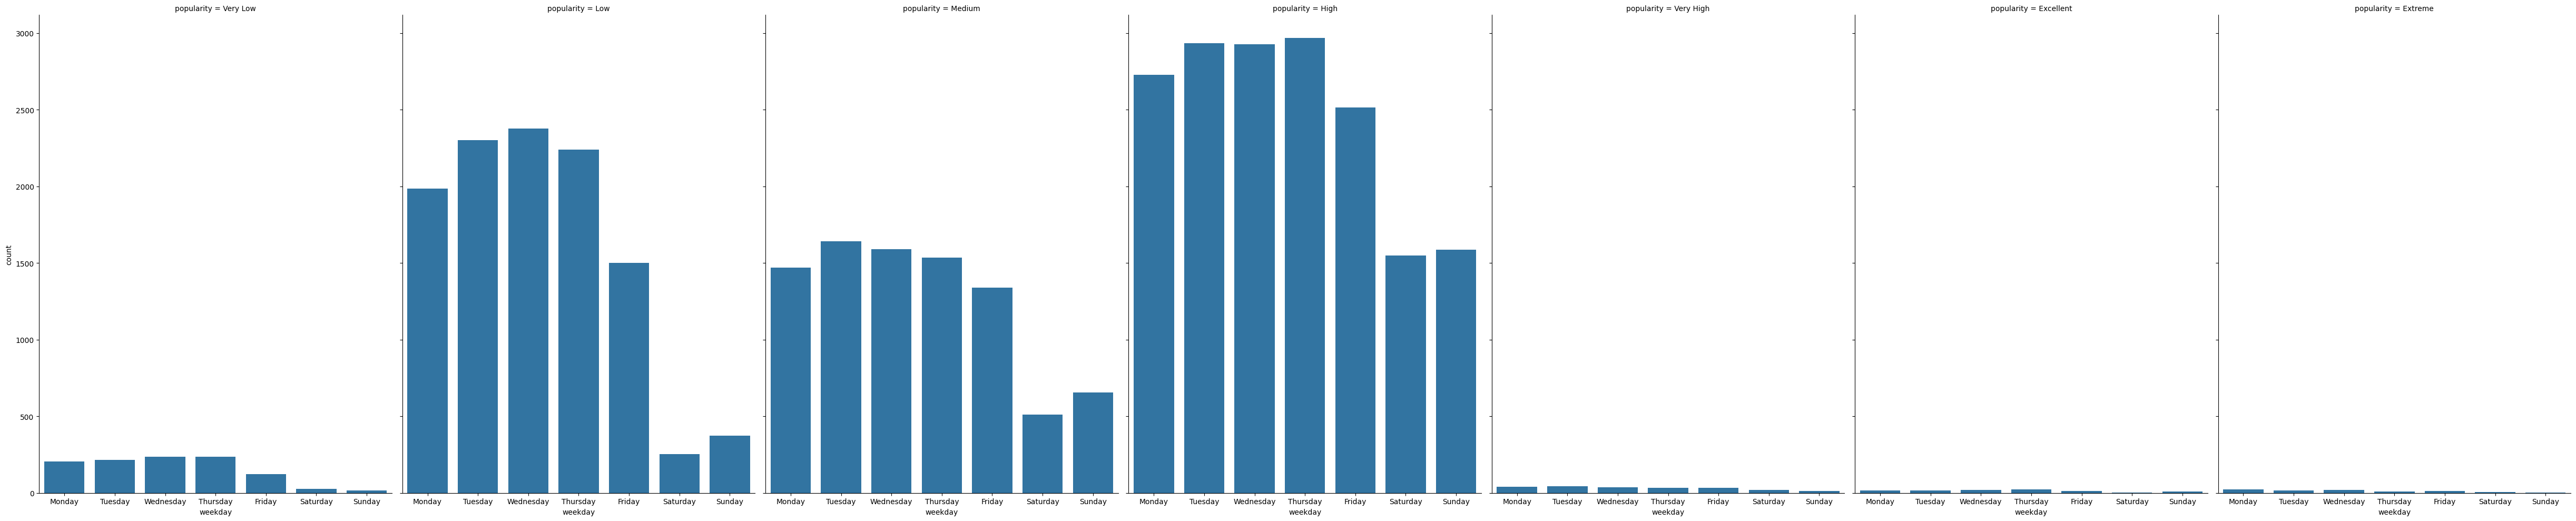

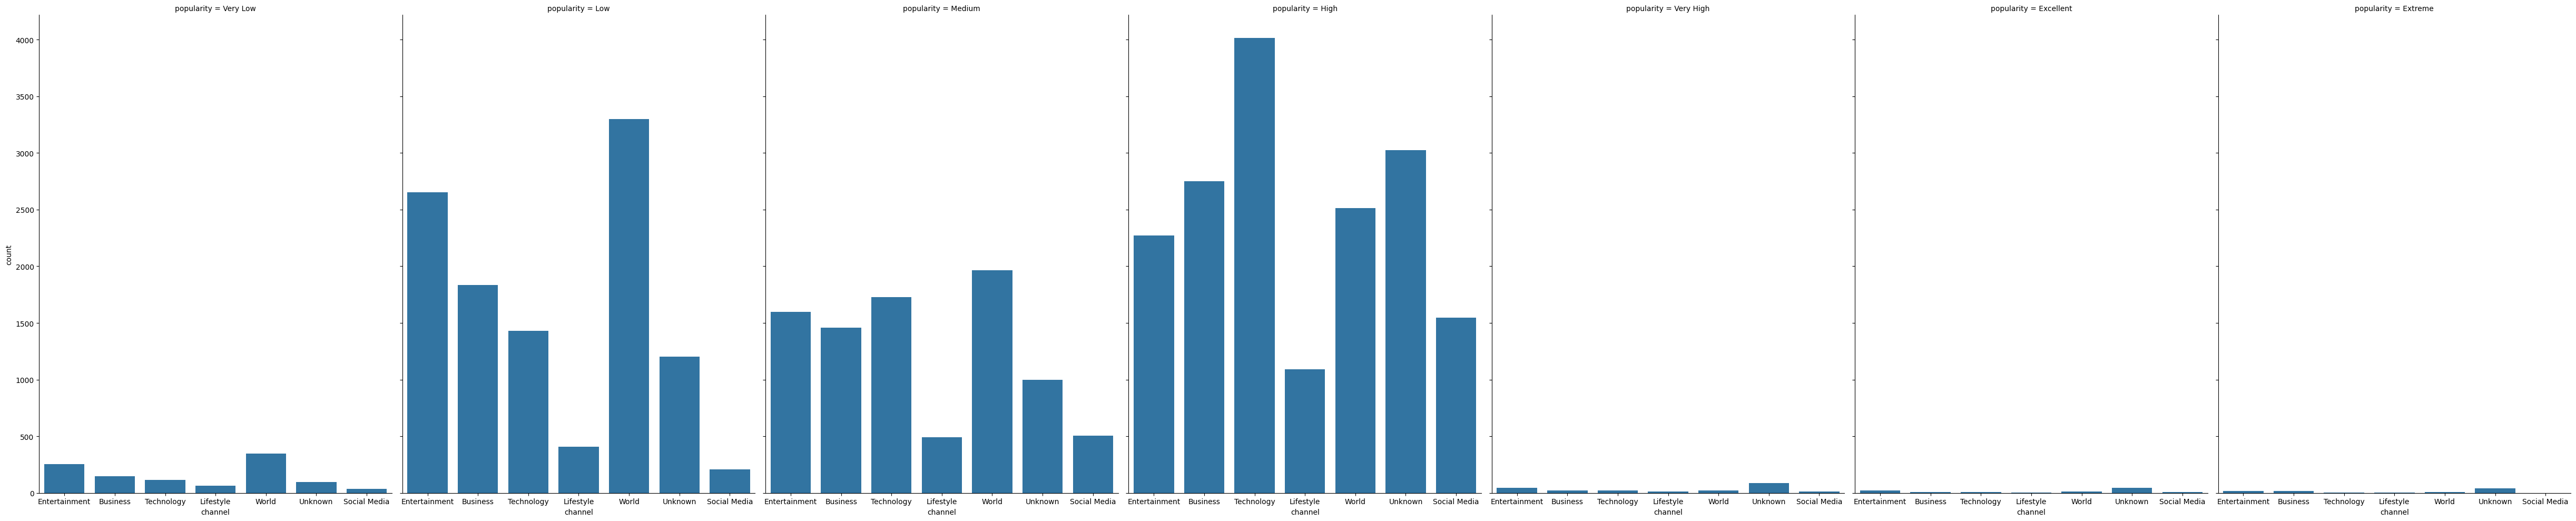

In [276]:
# Now that we've cleaned our dataset a bit, let's visualize the influence of the publishing days as well as that of the channels
# We have to keep in mind that it will be more precise for popularity below good (as what is above has too little data points)

sns.catplot(x='weekday', col="popularity", data=df, kind='count', height=10, aspect=.7)

sns.catplot(x='channel', col='popularity', data=df, kind='count', height=10, aspect=.7)

# So we see that technology seems to be the most popular subject and that articles published on the weekend do worse than those published on workdays

<Axes: xlabel=' n_tokens_content', ylabel='popularity'>

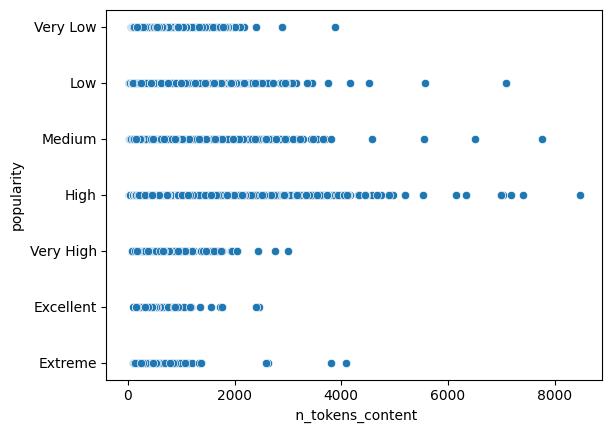

In [277]:
# Let's also check if there is a gaussian distribution among certain criteria such as the number of tokens in the title and 
# in the content of the articles

sns.scatterplot(x=' n_tokens_content', y='popularity', data=df)

<Axes: xlabel=' n_tokens_title', ylabel=' shares'>

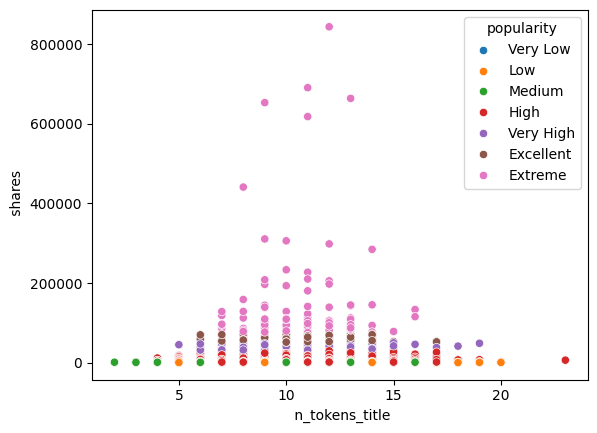

In [278]:
sns.scatterplot(x=' n_tokens_title', y=' shares', hue='popularity', data=df)

# It seems to follow a shape close to a gaussian distribution if we overlook the noise

In [279]:
# Let's separate df in two subsets and normalize the data

scaler = MinMaxScaler()
encoder1 = OrdinalEncoder()
encoder2 = LabelEncoder()

X = df.drop([' shares', 'popularity'], axis=1, inplace=False)
X = pd.DataFrame(encoder.fit_transform(X), columns=X.columns)
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
y = df['popularity']
y = pd.DataFrame(encoder2.fit_transform(y), columns=['popularity'])

**Making predictions using various models and hyperparameters**

In [280]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=False)
print(X_train.shape, X_test.shape)

acc_dict = {}

(26923, 39) (11539, 39)


Logistic Regression

In [282]:
params = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
accuracy = []

for C in params:
    lr = LogisticRegression(C=C, penalty='l2', solver='newton-cg')
    lr.fit(X_train, y_train)
    y_pred = lr.predict(X_test)
    accuracy.append(100*accuracy_score(y_pred, y_test))
print(accuracy)

# We can see that the best C value is 0.01

acc_dict['Logistic Regression'] = max(accuracy)

[45.20322384955369, 49.120374382528816, 48.90371782650143, 48.80838894184938, 48.895051564260335, 48.88638530201924, 48.88638530201924]


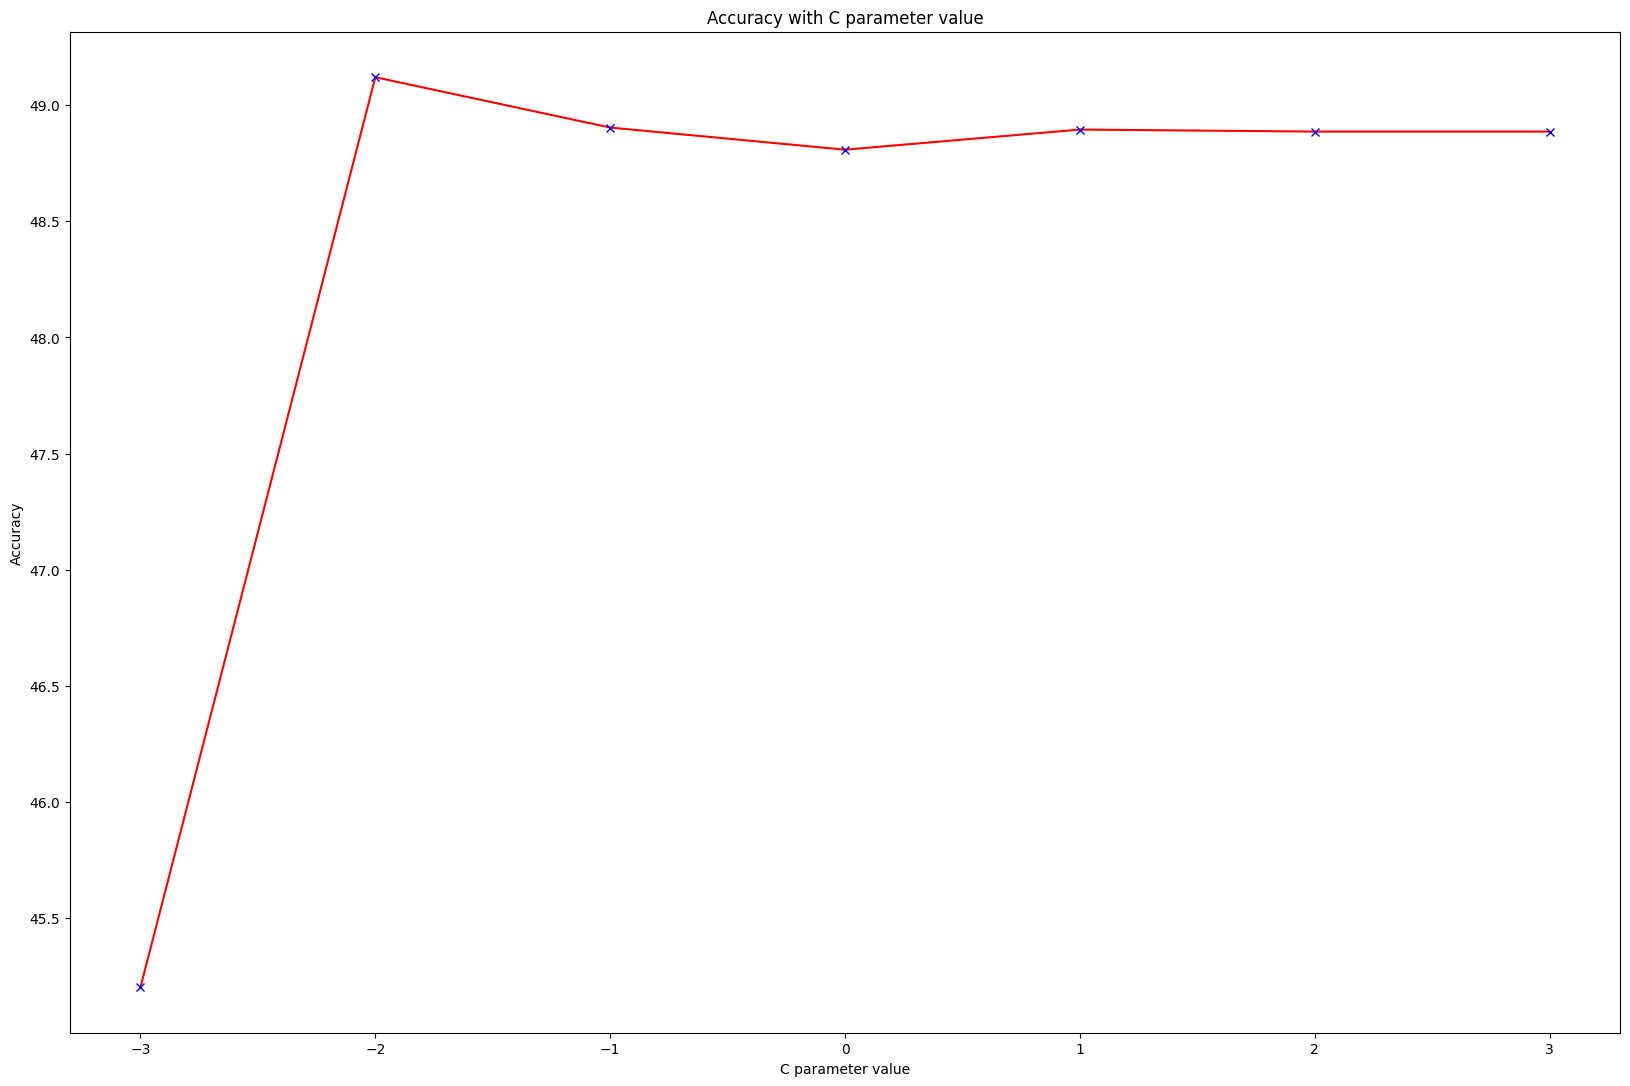

In [283]:
plt.figure(figsize=(20, 13))
plt.plot(np.log10(params), accuracy, 'r-')
plt.plot(np.log10(params), accuracy, 'bx')
plt.xlabel('C parameter value')
plt.ylabel('Accuracy')
plt.title('Accuracy with C parameter value')
plt.show()

Decision Tree Regressor

In [284]:
rfc = RandomForestClassifier(n_estimators=1000, n_jobs=-1, max_depth=50, random_state=0)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
accuracy = 100*accuracy_score(y_pred, y_test)
print(accuracy)

acc_dict['Random Forest Classifier'] = accuracy

51.2176098448739


<Axes: >

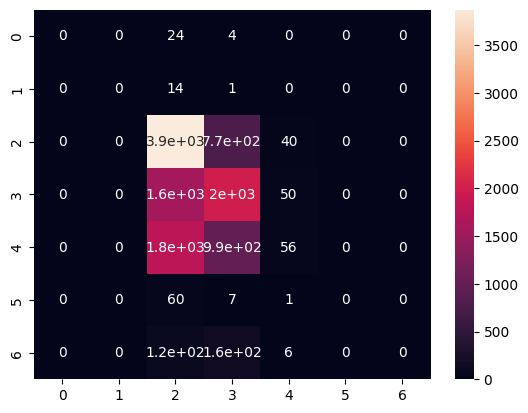

In [285]:
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix, annot=True)

KNN

In [286]:
accuracy = []

for k in range(1, 100):
    knc = KNeighborsClassifier(n_neighbors=k, n_jobs=-1)
    knc.fit(X_train, y_train)
    y_pred = knc.predict(X_test)
    accuracy.append(100*accuracy_score(y_pred, y_test))
print(accuracy)

acc_dict['KNN'] = max(accuracy)

[37.74157205997054, 42.10070196724153, 41.94470924690181, 42.57734639050177, 44.34526388768524, 44.37992893664962, 45.05589739145506, 45.61053817488517, 45.76653089522489, 45.81852846867146, 46.08718259814542, 46.321171678655, 46.26050784296733, 46.60715833261114, 46.85847993760291, 46.910477511049486, 47.291793049657684, 47.14446659155906, 47.4391195077563, 47.75110494843574, 47.87243261981107, 47.569113441372735, 47.59511222809602, 47.742438686194646, 47.8204350463645, 48.07175665135627, 48.002426553427505, 48.14975301152613, 48.31441199410694, 48.10642170032065, 48.349077043071325, 48.21041684721379, 48.53106855013433, 48.3837420920357, 48.64372995926857, 48.67839500823295, 48.773723892885, 48.71306005719733, 48.71306005719733, 48.86905277753705, 48.93838287546581, 48.87771903977814, 48.91238408874253, 49.20703700493977, 48.99904671115348, 48.92105035098362, 49.13770690701101, 49.03371176011786, 49.16370569373429, 49.181038218216486, 49.13770690701101, 49.1463731692521, 48.999046711

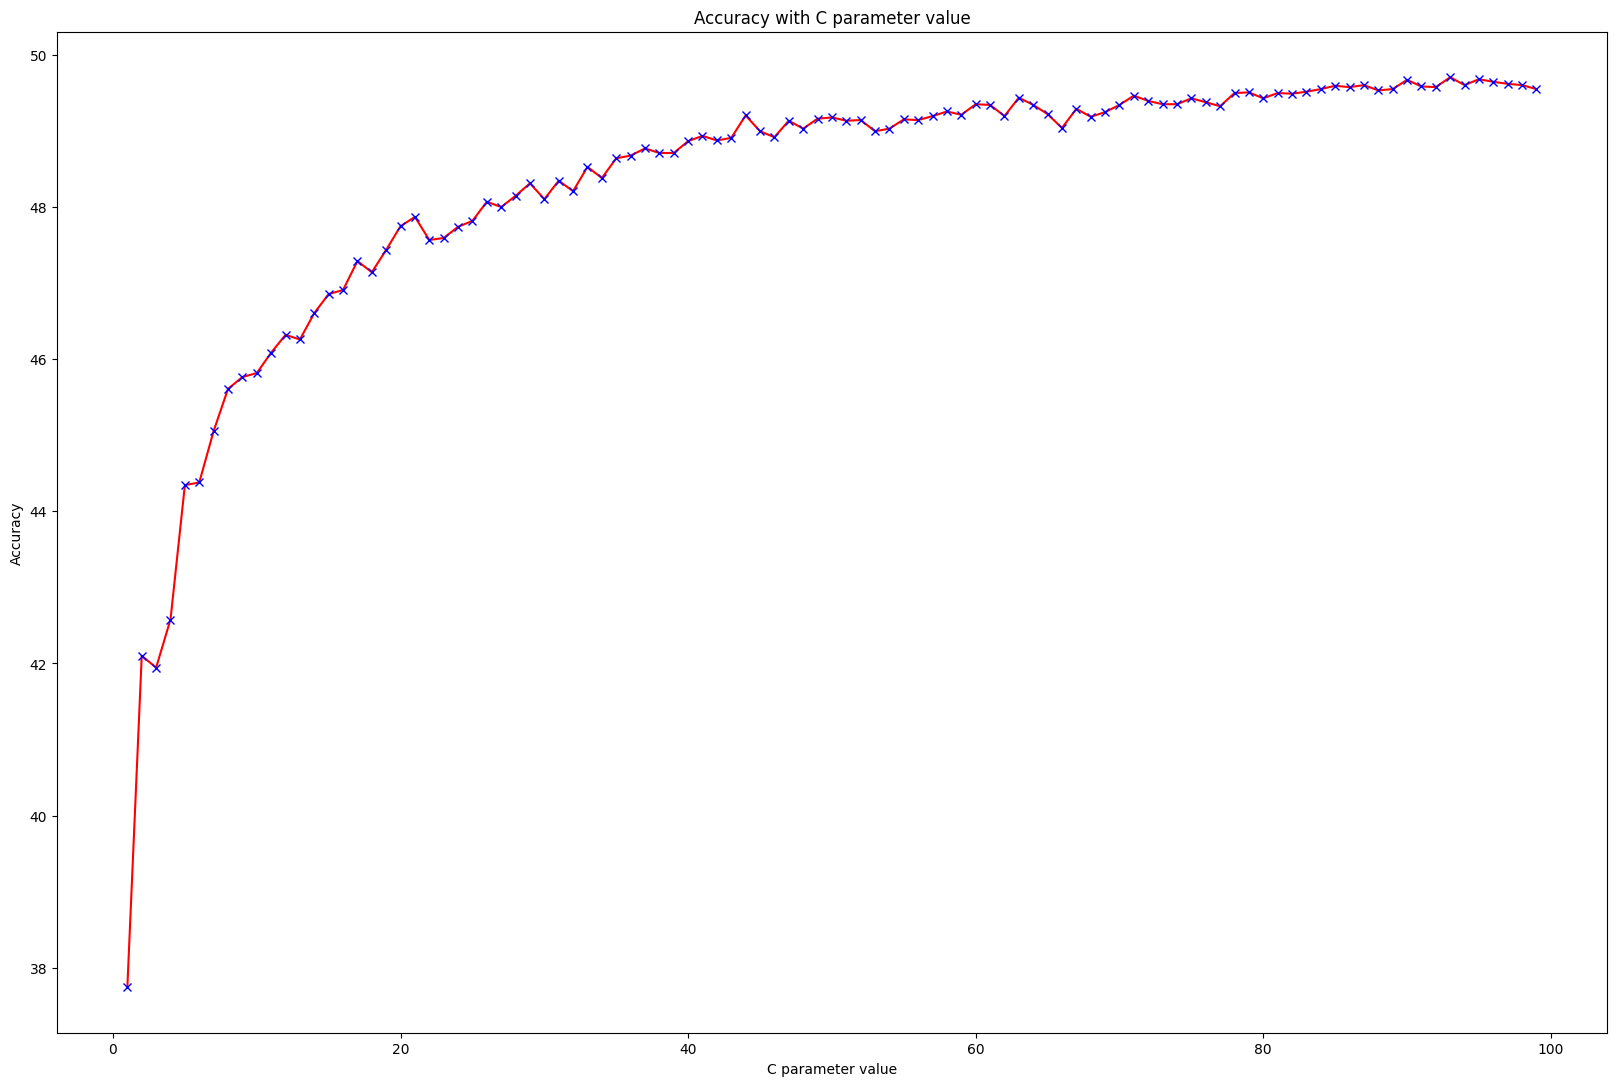

In [287]:
plt.figure(figsize=(20, 13))
plt.plot(range(1, 100), accuracy, 'r-')
plt.plot(range(1, 100), accuracy, 'bx')
plt.xlabel('C parameter value')
plt.ylabel('Accuracy')
plt.title('Accuracy with C parameter value')
plt.show()

SVC

In [288]:
svc = SVC(gamma='auto')

svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
accuracy = accuracy_score(y_pred, y_test)
print(accuracy)

acc_dict['SVC'] = accuracy

0.4880838894184938


In [289]:
# Now we can print our results and conclude on which model is the best

print(acc_dict)

{'Logistic Regression': 49.120374382528816, 'Random Forest Classifier': 51.2176098448739, 'KNN': 49.7096802149233, 'SVC': 0.4880838894184938}


Therefore we can conclude that RandomForestClassifier is the best model to make predictions on the popularity of the articles of this dataset.